# BlockChain Assignment 1
# Group Members: 
1. Hassan Kamran (202i2435)  
2. Abdullah Hameed (20i1799)
# Section: AI-J

#### (Problem 2) By Hassan Kamran Roll no. i202435
#### verification of transactions from merkel tree

### creation of merkel tree

In [370]:
from collections import defaultdict

class MerkleNode:
    def __init__(self, hash_value):
        self.hash_value = hash_value
        self.left = None
        self.right = None
    
    def __add__(self,obj2):
        
        root = MerkleNode(self.hash_value+obj2.hash_value)
        #print('root hash val ',root.hash_value,'c1+c2:',self.hash_value,' ',obj2.hash_value )
        return root 

    def get_hash(self):
        return self.hash_value

In [371]:
# GENERATING PROOF OF TRANSACTIONS:

In [372]:
    
def generate_consecutive_pairs(numbers):
    pairs = []
    
    for i in range(0,len(numbers) - 1,2):
        pairs.append(((numbers[i]), (numbers[i + 1])))
        
    if len(numbers)%2 ==1 : 
        pairs.append(numbers[-1])

    return pairs
    
def createNodes(List):
    temp = []
    temp2 = {}
    for i in List:
        temp.append(MerkleNode(i))
        temp2[MerkleNode(i)]=[]
    return temp
    
def add_root(tran1,tran2):
    #print('revoked by us: ',tran1,' ',tran2)
    return tran1 + tran2

def build_tree(input_list):
        
    child = createNodes(input_list)
    ChildDict = defaultdict(list)
    #print('Initial: ',child)
    while len(child) != 1 and child != tuple:
        pairs = generate_consecutive_pairs(child)  
        child = []
        #print(pairs)
        #print(end='\n\n')
        

        for i,Node in enumerate(pairs):
            #print('iter ',i)
            if type(Node) != tuple:
                child.append(Node)
                ChildDict[Node.hash_value].append((Node,root))

                

            else:
                c1 = Node[0] #child 1
                c2 = Node[1]
                root = add_root(c1,c2)
                #print('new root hash: ',root.hash_value)
                root.left = c1
                root.right = c2
                child.append(root)
                
                #FOR PROOF OF TRANSACTION:
                
                ChildDict[Node[0].hash_value].append((Node[1],root))
                ChildDict[Node[1].hash_value].append((Node[0],root))

            
            ChildDict[root] = []
                
                #print('just checking node: ',root,' hash: ', root.hash_value)
        
    return child[0],ChildDict
        
        
input_list = [1, 2,3,4,5,6,7,8,9]
root,verifyDict = build_tree(input_list)

print('Root hash is: ',root.hash_value)

Root hash is:  45


## this is the verification dictionary that I will use to verify the transaction proof

In [373]:
print(verifyDict) #This dictionary will be used for the verification process

defaultdict(<class 'list'>, {1: [(<__main__.MerkleNode object at 0x000002540D93F510>, <__main__.MerkleNode object at 0x000002540D79FE10>)], 2: [(<__main__.MerkleNode object at 0x000002540CBCD290>, <__main__.MerkleNode object at 0x000002540D79FE10>)], <__main__.MerkleNode object at 0x000002540D79FE10>: [], 3: [(<__main__.MerkleNode object at 0x000002540D79FE50>, <__main__.MerkleNode object at 0x000002540D77B990>), (<__main__.MerkleNode object at 0x000002540D77B990>, <__main__.MerkleNode object at 0x000002540D79D910>)], 4: [(<__main__.MerkleNode object at 0x000002540D7790D0>, <__main__.MerkleNode object at 0x000002540D77B990>)], <__main__.MerkleNode object at 0x000002540D77B990>: [], 5: [(<__main__.MerkleNode object at 0x000002540D79E910>, <__main__.MerkleNode object at 0x000002540D757F50>)], 6: [(<__main__.MerkleNode object at 0x000002540D79EA10>, <__main__.MerkleNode object at 0x000002540D757F50>)], <__main__.MerkleNode object at 0x000002540D757F50>: [], 7: [(<__main__.MerkleNode objec

In [374]:
def visualize_merkle_tree(node, depth=0):
    if node is None:
        return

    #prefix = "  " * depth
    print(f"{node.get_hash()}")

    visualize_merkle_tree(node.left, depth + 1)
    visualize_merkle_tree(node.right, depth + 1)

# Verification

### This verification is for the hashes in integer number

In [377]:
def verification(trans, verifyDict, root):
    key = trans
    final_hash=0
    while verifyDict[key] != []:
        final_hash = final_hash + verifyDict[key][0][0].hash_value
        key = verifyDict[key][0][1].hash_value
        
    flag = True
    
    if key != root.hash_value:
        print('Root is: ',root)
        print('Calculated hash is: ',key)
        flag = False
        
    return flag
        

In [378]:
print("The original root hash is: ", root)
final_hash = verification(1,verifyDict,root) #pass trasaction hash which i 1 in this case, verification dictionary that contains hierarcal hashes and Root hash

The original root hash is:  <__main__.MerkleNode object at 0x000002540D756190>


In [379]:
final_hash # which is equal to the original hash
if final_hash == True:
    print('Transaction verified!')
else:
    print('Transaction not verified!')
    

Transaction verified!


# now using actual hash function

In [380]:
import hashlib

In [381]:
transactions = [hashlib.sha256(f'transaction{i}'.encode()).digest() for i in range(4)]
print('These are the transactions: ')
for i,x in enumerate(transactions):
    print(i,x)

These are the transactions: 
0 b'\xf0\xb6^\xc5\xe5?\xa0dx\x88\xc6\x83\xc0\xac\xea}\x18\xaf\x99\xf8\xacC\x9aR\xd8\x99c9K\x95\xe82'
1 b'\xbd\xe4i>U\xa36\xff\x81\xab#\x8c\xe2\x0c\xae\x1d\xd9\xc8\xba\x03\xb9\xb8\xf49c\xf5V\x9b\xf3\xcfR)'
2 b'K\xea\xce\x8b\xdc\xf9\xb5\xb7F0\xea\xee.\x7fP\x11\x80\xe4`%\xca\x89\xb0^~\x04\x1f\xbe\x95=\x81z'
3 b')7U\xabc\x84\xe0-\x92\x02\xd4\x83\xf2\xf0%\x01\x00\xd7\x86\xe7_\xda\xb1\xb6\xf3\x92[(\x00\xec\xe3\xcb'


In [382]:
#input_list = [1, 2,3,4,5,6,7,8,9]
root,verifyDict = build_tree(transactions)

print('Root hash is: ',root.hash_value)

Root hash is:  b'\xf0\xb6^\xc5\xe5?\xa0dx\x88\xc6\x83\xc0\xac\xea}\x18\xaf\x99\xf8\xacC\x9aR\xd8\x99c9K\x95\xe82\xbd\xe4i>U\xa36\xff\x81\xab#\x8c\xe2\x0c\xae\x1d\xd9\xc8\xba\x03\xb9\xb8\xf49c\xf5V\x9b\xf3\xcfR)K\xea\xce\x8b\xdc\xf9\xb5\xb7F0\xea\xee.\x7fP\x11\x80\xe4`%\xca\x89\xb0^~\x04\x1f\xbe\x95=\x81z)7U\xabc\x84\xe0-\x92\x02\xd4\x83\xf2\xf0%\x01\x00\xd7\x86\xe7_\xda\xb1\xb6\xf3\x92[(\x00\xec\xe3\xcb'


In [383]:
def verification(trans, verifyDict,root):
    key = trans
    final_hash=b''
    while verifyDict[key] != []:
        final_hash = final_hash + verifyDict[key][0][0].hash_value
        key = verifyDict[key][0][1].hash_value
        
    flag = True
    for i,j in zip(key,root.hash_value):
        if i != j:
            flag = False        
    return key,flag
        

In [386]:
final_hash,flag = verification(transactions[1],verifyDict,root)

if flag == True:
    print('Transaction Verified!')
else:
    print('Note Verified')
    

Transaction Verified!


In [387]:
final_hash, root.hash_value #just for seeing the values 

(b'\xf0\xb6^\xc5\xe5?\xa0dx\x88\xc6\x83\xc0\xac\xea}\x18\xaf\x99\xf8\xacC\x9aR\xd8\x99c9K\x95\xe82\xbd\xe4i>U\xa36\xff\x81\xab#\x8c\xe2\x0c\xae\x1d\xd9\xc8\xba\x03\xb9\xb8\xf49c\xf5V\x9b\xf3\xcfR)K\xea\xce\x8b\xdc\xf9\xb5\xb7F0\xea\xee.\x7fP\x11\x80\xe4`%\xca\x89\xb0^~\x04\x1f\xbe\x95=\x81z)7U\xabc\x84\xe0-\x92\x02\xd4\x83\xf2\xf0%\x01\x00\xd7\x86\xe7_\xda\xb1\xb6\xf3\x92[(\x00\xec\xe3\xcb',
 b'\xf0\xb6^\xc5\xe5?\xa0dx\x88\xc6\x83\xc0\xac\xea}\x18\xaf\x99\xf8\xacC\x9aR\xd8\x99c9K\x95\xe82\xbd\xe4i>U\xa36\xff\x81\xab#\x8c\xe2\x0c\xae\x1d\xd9\xc8\xba\x03\xb9\xb8\xf49c\xf5V\x9b\xf3\xcfR)K\xea\xce\x8b\xdc\xf9\xb5\xb7F0\xea\xee.\x7fP\x11\x80\xe4`%\xca\x89\xb0^~\x04\x1f\xbe\x95=\x81z)7U\xabc\x84\xe0-\x92\x02\xd4\x83\xf2\xf0%\x01\x00\xd7\x86\xe7_\xda\xb1\xb6\xf3\x92[(\x00\xec\xe3\xcb')

#### (Problem 1) By Abdullah Hammed Roll no. 20i1799

In [388]:
import hashlib
import random
import threading

def generate_random_input():
    return str(random.randint(0, 2**128))

# Shared variable to signal other threads to stop
found_match = False

def SHA0_125(prefix_length):
    global found_match
    while not found_match:
        input1 = 1
        input2 = 1
        while input1 == input2:
            input1 = generate_random_input()
            input2 = generate_random_input()

        hash1 = hashlib.sha256(input1.encode()).hexdigest()[:8]
        hash2 = hashlib.sha256(input2.encode()).hexdigest()[:8]

        if hash1[:prefix_length] == hash2[:prefix_length]:
            found_match = True
            print("Input 1:", input1)
            print("Input 2:", input2)
            print("Hash 1:", hash1)
            print("Hash 2:", hash2)

# Set the desired prefix length (e.g., 8 bits)
prefix_length = 6

# Number of threads to run in parallel
num_threads = 8

# Create and start multiple threads
threads = []
for _ in range(num_threads):
    thread = threading.Thread(target=SHA0_125, args=(prefix_length,))
    threads.append(thread)
    thread.start()

# Wait for all threads to finish or for a match to be found
for thread in threads:
    thread.join()

# Signal other threads to stop
found_match = True

Input 1: 110158270378238045996445726836066360220
Input 2: 188900606118010716240243424193999537289
Hash 1: 209d6546
Hash 2: 209d6566


KeyboardInterrupt: 

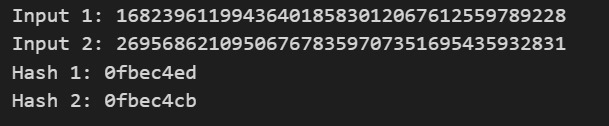

In [397]:
from PIL import Image
Image.open(r'C:\Users\Hassan\Desktop\SEMESTER 7\BLOCKCHAIN\ASSIGNMENT 2\collision in sha125.jpg')